In [22]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

file = open('gamma0.pickle', 'rb')
solutions = pickle.load(file)
file.close()

In [23]:
#Dispersion relation
R_dim = 30e3
R_nondim = R_dim/300e3
beta_dim = 2e-12
beta_nondim = beta_dim * 86400 * 300e3

#Fourier harmonics
S = 10 #spectral radius
N = 41

def omega(k,l):
    return -beta_nondim * k / (k**2 + l**2 + R_nondim**-2)

P = 5 #radius of peak
H = 0.008 #height of peak (max amplitude)

def A(k,l):
  return H * np.exp(-0.5*(k**2+l**2-P**2)**2/(2*P**2))

k,l = np.linspace(-S,S,N),np.linspace(-S,S,N)
K,L = np.meshgrid(k,l)
phi = np.random.uniform(0,2*np.pi,size=(N,N))
omega_vals = omega(K,L)

def modulo_grid(x, y):
  x_mod = np.mod(x + np.pi, 2 * np.pi) - np.pi
  y_mod = np.mod(y + np.pi, 2 * np.pi) - np.pi
  return x_mod, y_mod

def f(t,pos):
  x_mod,y_mod = modulo_grid(*pos)
  t = 30
  dx = -np.real(np.sum(1j*K*A(K,L)*np.exp(1j*(K*x_mod + L*y_mod - omega_vals*t + phi))))
  dy = np.real(np.sum(1j*L*A(K,L)*np.exp(1j*(K*x_mod + L*y_mod - omega_vals*t + phi))))
  return [dx,dy]

2.7480538241798236e-05
1.8054165660328917e-05
4.124671133630707e-05
4.060937901172721e-05
3.932989590334082e-05
8.436610891910006e-05
4.7733838154997594e-05
0.0001613765735261493
4.3834895051172265e-05
3.896042590697034e-05
8.573151566550588e-05
2.039911835456411e-05
7.751758075611304e-05
1.350552631199596e-05
6.683099237292614e-05
-9.63060709649247e-06
-1.643762897017955e-05
9.164421846411867e-05
2.4554133270539656e-05
7.749099625885752e-05
2.8865179567460818e-05
5.0160363702729006e-05
4.059800178659686e-05
4.613883959054087e-05
4.3365075598925593e-05
4.77476098456105e-05
-1.5209554316912658e-05
2.8840524136440665e-05
1.7276226120195327e-05
2.7046986434510845e-05
6.604305189232566e-05
7.818656625751691e-05
6.686815267882139e-05
3.925790764729105e-06
5.005322867401116e-06
2.2911362004927867e-05
-6.822974146955275e-05
-1.3945477853973723e-05
-1.0552984476950802e-05
-5.161570455143694e-06
-3.3585087944451795e-05
-3.802723251544964e-05
-1.2278702014905825e-05
-9.395626706882191e-06
-4.901

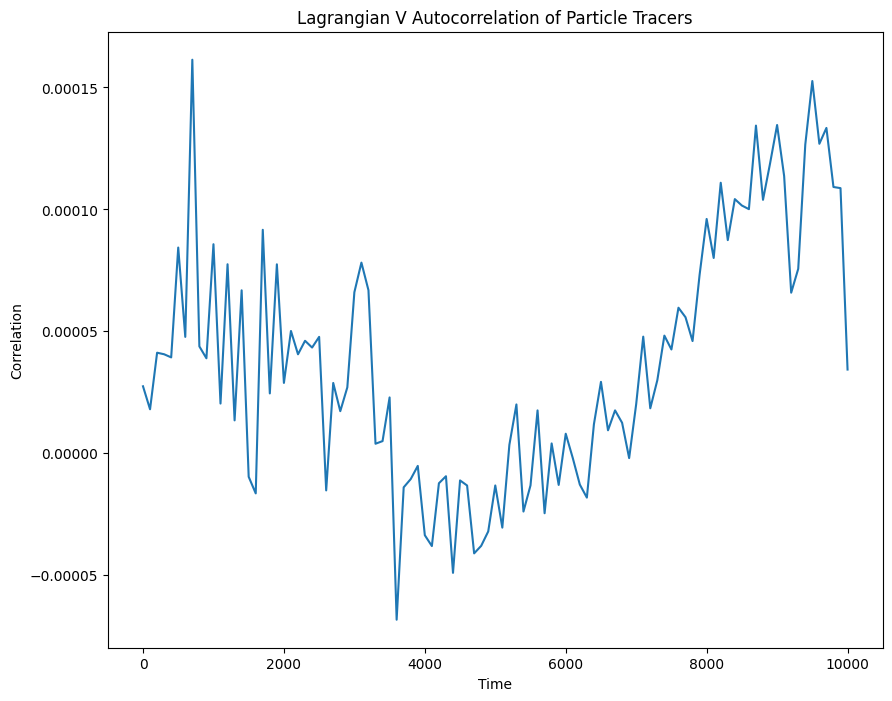

In [24]:
vaf_list=[] #empty velocity autocorrelations list
n = 10001
time_steps_list= range(0,10001, 100)

for time in time_steps_list:
    
    dot_prod = 0 #initialise dot product for each different time
    
    for sol in solutions:

        x = sol[:,0] #extrapolate coordinates for position to feed into function f 
        y = sol[:,1]
        
        initial_time = 0
        initial_x = x[0]
        initial_y = y[0]
        initial_x_vel = f(initial_time, [initial_x, initial_y])[0]
        initial_y_vel = f(initial_time, [initial_x, initial_y])[1]
        
        new_x = x[time]
        new_y = x[time]
        
        vel = f(time, [new_x, new_y]) #computes x velocity at specific time and position        
        x_vel = vel[0]
        y_vel = vel[1]
        
        dot_prod += initial_y_vel * y_vel 
        
    vaf_list.append(dot_prod/n)

for vaf in vaf_list:
    print(vaf)

fig, ax = plt.subplots()
ax.plot(time_steps_list, vaf_list)
fig.set_size_inches(10, 8)
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.title('Lagrangian V Autocorrelation of Particle Tracers')
plt.show()

In [25]:
file = open('gamma1.pickle', 'rb')
solutions = pickle.load(file)
file.close()

0.0027483286295622417
0.00553204360412378
0.004776681211494968
0.003988863435656733
0.0031805973518659477
0.0023644033078205427
0.0015526856413985788
0.0009953012087895203
0.00036271814926660455
-0.00027242456606728577
-0.0009000578633409767
-0.002725274929244853
-0.0031559705554119306
-0.002126654761742836
-0.0038151044080642106
-0.003992982488083409
-0.0040915349810737404
-0.004110168568606044
-0.004049560074321942
-0.003911627521273122
-0.0036994834739715187
-0.003417371320876397
-0.00307058534312357
-0.002665375608755682
-0.002208838927275142
-0.0017087972951942076
-0.001173665456937138
-0.0006123093937711307
-3.3897732529369896e-05
0.000552251768808068
0.0016421885007719523
0.002508829318180645
0.004626254121528509
0.0043517725134594645
0.005434455479053301
0.007146894282625782
0.00749449713425697
0.007976636671399456
0.007988880052692483
0.010548939920370846
0.010149550768790984
0.009807990022926202
0.0065377645726977995
0.006067582377251044
0.002282097731348938
0.002048773790029

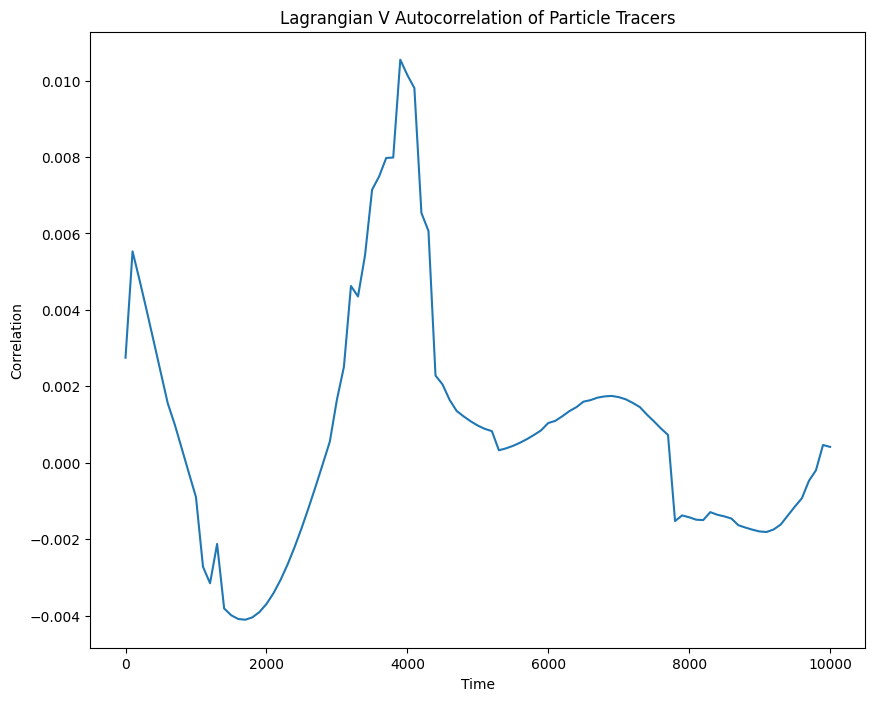

In [27]:
vaf_list=[] #empty velocity autocorrelations list
n = 10001
time_steps_list= range(0,10001, 100)

for time in time_steps_list:
    
    dot_prod = 0 #initialise dot product for each different time
    
    for sol in solutions:

        x = sol[:,0] #extrapolate coordinates for position to feed into function f 
        y = sol[:,1]
        
        initial_time = 0
        initial_x = x[0]
        initial_y = y[0]
        initial_x_vel = f(initial_time, [initial_x, initial_y])[0]
        initial_y_vel = f(initial_time, [initial_x, initial_y])[1]
        
        new_x = x[time]
        new_y = x[time]
        
        vel = f(time, [new_x, new_y]) #computes velocity at specific time and position        
        x_vel = vel[0]
        y_vel = vel[1]
        
        dot_prod += initial_y_vel * y_vel
        
    vaf_list.append(dot_prod/100)

for vaf in vaf_list:
    print(vaf)

fig, ax = plt.subplots()
ax.plot(time_steps_list, vaf_list) #plot x and y values
fig.set_size_inches(10, 8)
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.title('Lagrangian V Autocorrelation of Particle Tracers')
plt.show() 